# Feature selection

This content is mainly based on the following scikit learn documentations:

- [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)
- [Model-based and sequential feature selection](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py) from Manoj Kumar, Maria Telenczuk and Nicolas Hug.
- [Common pitfalls in the interpretation of coefficients of linear models](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

## Import data

To get a detailed overview about the following data preparation, visit [this tutorial](https://kirenz.github.io/regression/docs/lasso.html#data)

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/hitters-clean.csv")

y = df['Salary']
X = df.drop(['Salary'], axis=1).astype('float')

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


list_numerical = X_numerical.columns
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train = scaler.transform(X_train[list_numerical])
X_test = scaler.transform(X_test[list_numerical])

df.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N


In [115]:
feature_names

array(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts',
       'Assists', 'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype=object)

In [114]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## Model

We fit a lasso regression with 5-fold cross validation to choose the best regularization parameter based on the mean squared error:

In [53]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, random_state=10, max_iter=10000).fit(X_train, y_train)

In [54]:
# show best alpha parameter
reg.alpha_

25.13527859160674

Show feature importance plot

In [56]:
print(list(zip(reg.coef_, feature_names)))

[(0.0, 'AtBat'), (95.65781002213558, 'Hits'), (-0.0, 'HmRun'), (0.0, 'Runs'), (0.0, 'RBI'), (47.53698301615358, 'Walks'), (0.0, 'Years'), (0.0, 'CAtBat'), (0.0, 'CHits'), (0.0, 'CHmRun'), (118.35868649369893, 'CRuns'), (99.71747797713148, 'CRBI'), (0.0, 'CWalks'), (46.60969823187552, 'PutOuts'), (-0.0, 'Assists'), (-0.0, 'Errors')]


In [99]:
import numpy as np

coef_dict = {}
for coef, feat in zip(reg.coef_,feature_names):
    coef_dict[feat] = coef

df_ = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['coef'])
df_['importance'] = df_.coef.abs()
df_['feature_names'] = df_.index    

In [100]:
df_

,coef,importance,feature_names
AtBat,0.000000,0.000000,AtBat
Hits,95.657810,95.657810,Hits
HmRun,-0.000000,0.000000,HmRun
Runs,0.000000,0.000000,Runs
RBI,0.000000,0.000000,RBI
Walks,47.536983,47.536983,Walks
Years,0.000000,0.000000,Years
CAtBat,0.000000,0.000000,CAtBat
CHits,0.000000,0.000000,CHits
CHmRun,0.000000,0.000000,CHmRun


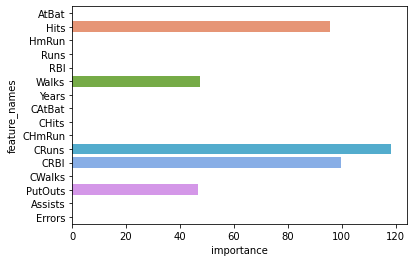

In [101]:
import seaborn as sns

sns.barplot(x='importance', y='feature_names', data=df_);

## Feature selection

### Based on importance

We want to select the two features which are the most important according to the coefficients. The SelectFromModel is meant just for that. SelectFromModel accepts a threshold parameter and will select the features whose importance (defined by the coefficients) are above this threshold.

In our case, we want to select only 2 features. Hence, we will set the threshold slightly above the coefficient of the third most important feature. 

We also record the time the algorithm takes to obtain the results.

In [111]:
features

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')

In [112]:
from sklearn.feature_selection import SelectFromModel
from time import time

# set threshold
threshold = np.sort(df_.importance)[-3] + 1
features =  np.array(df_.index)

# obtain time
tic = time()

# fit model
sfm = SelectFromModel(reg, threshold=threshold).fit(X, y)

# obtain time
toc = time()

# print results
print(f"Features selected by SelectFromModel: {features[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 16 but corresponding boolean dimension is 19

### Sequential Feature Selection (SFS)

Another way of selecting features is to use SequentialFeatureSelector (SFS). SFS is a greedy procedure where, at each iteration, we choose the best new feature to add to our selected features based a cross-validation score. 

- `Forward-Selection`: That is, we start with 0 features and choose the best single feature with the highest score. The procedure is repeated until we reach the desired number of selected features.

- `Backward selection`: We can also go in the reverse direction (backward SFS), i.e. start with all the features and greedily choose features to remove one by one. We illustrate both approaches here.



#### Forward selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()

sfs_forward = SequentialFeatureSelector(
    lasso, n_features_to_select=2, direction="forward"
).fit(X, y)

toc_fwd = time()

In [ ]:
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

#### Backward selection

In [ ]:
tic_bwd = time()

sfs_backward = SequentialFeatureSelector(
    lasso, n_features_to_select=2, direction="backward"
).fit(X, y)

toc_bwd = time()

In [ ]:
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

## Discussion

To finish with, we should note that 

- SelectFromModel is significantly faster than SFS (SelectFromModel only needs to fit a model once, while SFS needs to cross-validate many different models for each of the iterations)

- SFS however works with any model, while SelectFromModel requires the underlying estimator to expose a coef_ attribute or a feature_importances_ attribute. 

- The forward SFS is faster than the backward SFS because it only needs to perform n_features_to_select = 2 iterations, while the backward SFS needs to perform n_features - n_features_to_select.